

Design and implement a  for fruit classification, and then apply  by utilizing at least  to achieve the same objective.  
Dataset link

!kaggle datasets download utkarshsaxenadn/fruits-classification



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Fruits.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Data Preprocessing

In [ ]:
train_dir = "/content/Fruits Classification/train"
val_dir = "/content/Fruits Classification/valid"
test_dir = "/content/Fruits Classification/test"

img_size = (224, 224)  # Standard input size for pretrained models
batch_size = 32


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   horizontal_flip=True, shear_range=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size,
                                                    batch_size=batch_size, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size,
                                                batch_size=batch_size, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size,
                                                  batch_size=batch_size, class_mode='categorical')

num_classes = len(train_generator.class_indices)  # Get total number of fruit classes


Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


### CNN Model

In [ ]:
cnn_model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 118s 366ms/step - accuracy: 0.3774 - loss: 1.4998 - val_accuracy: 0.4800 - val_loss: 1.2329
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 107s 352ms/step - accuracy: 0.5208 - loss: 1.1390 - val_accuracy: 0.5450 - val_loss: 1.1091
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 109s 359ms/step - accuracy: 0.5525 - loss: 1.0811 - val_accuracy: 0.5700 - val_loss: 1.0394
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 106s 350ms/step - accuracy: 0.5863 - loss: 1.0160 - val_accuracy: 0.5850 - val_loss: 1.0114
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 108s 355ms/step - accuracy: 0.5921 - loss: 0.9861 - val_accuracy: 0.6100 - val_loss: 0.9932
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 108s 355ms/step - accuracy: 0.6109 - loss: 0.9457 - val_accuracy: 0.5850 - val_loss: 0.9772
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 107s 353ms/step - accuracy: 0.6239 - loss: 0.9357 - val_accuracy: 0.5800 - val_loss: 0.9316
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 108s 354ms/step - accuracy: 0.6555 -

In [ ]:
cnn_model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.6807 - loss: 0.8349


[0.8477061986923218, 0.6600000262260437]

### Transfer Learning with VGG19

In [ ]:
base_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_vgg.layers:
    layer.trainable = False  # Freeze base layers

x = Flatten()(base_vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_vgg.input, outputs=x)

vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,448,453 (100.89 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
history_vgg = vgg_model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 137s 451ms/step - accuracy: 0.5121 - loss: 1.2316 - val_accuracy: 0.6900 - val_loss: 0.8744
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 128s 420ms/step - accuracy: 0.6435 - loss: 0.9403 - val_accuracy: 0.7400 - val_loss: 0.7702
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 127s 418ms/step - accuracy: 0.7008 - loss: 0.8180 - val_accuracy: 0.7500 - val_loss: 0.7018
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 127s 416ms/step - accuracy: 0.7094 - loss: 0.7715 - val_accuracy: 0.7250 - val_loss: 0.7231
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 126s 414ms/step - accuracy: 0.7361 - loss: 0.7185 - val_accuracy: 0.8150 - val_loss: 0.6353
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 126s 414ms/step - accuracy: 0.7379 - loss: 0.7151 - val_accuracy: 0.7650 - val_loss: 0.6399
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 125s 411ms/step - accuracy: 0.7398 - loss: 0.7019 - val_accuracy: 0.7650 - val_loss: 0.6055
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 125s 410ms/step - accuracy: 0.7653 -

In [ ]:
vgg_model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.8210 - loss: 0.5555


[0.570463240146637, 0.800000011920929]

### Transfer Learning with ResNet50

In [ ]:
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_resnet.layers:
    layer.trainable = False  # Freeze base layers

x = Flatten()(base_resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_resnet.input, outputs=x)

resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 49,279,365 (187.99 MB)

 Trainable params: 25,691,653 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history_resnet = resnet_model.fit(train_generator, epochs=10, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 140s 409ms/step - accuracy: 0.2221 - loss: 1.7783 - val_accuracy: 0.2450 - val_loss: 1.5963
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 111s 365ms/step - accuracy: 0.2288 - loss: 1.5913 - val_accuracy: 0.3100 - val_loss: 1.5908
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 112s 368ms/step - accuracy: 0.2459 - loss: 1.5867 - val_accuracy: 0.3100 - val_loss: 1.5600
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 113s 371ms/step - accuracy: 0.2391 - loss: 1.5768 - val_accuracy: 0.2950 - val_loss: 1.5579
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 112s 369ms/step - accuracy: 0.2391 - loss: 1.5691 - val_accuracy: 0.3000 - val_loss: 1.5489
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 141s 366ms/step - accuracy: 0.2542 - loss: 1.5706 - val_accuracy: 0.3000 - val_loss: 1.5535
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 112s 369ms/step - accuracy: 0.2573 - loss: 1.5589 - val_accuracy: 0.3350 - val_loss: 1.5333
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 142s 370ms/step - accuracy: 0.2751 -

In [ ]:
resnet_model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 0.3699 - loss: 1.5234


[1.5115505456924438, 0.3700000047683716]

### Compare Results

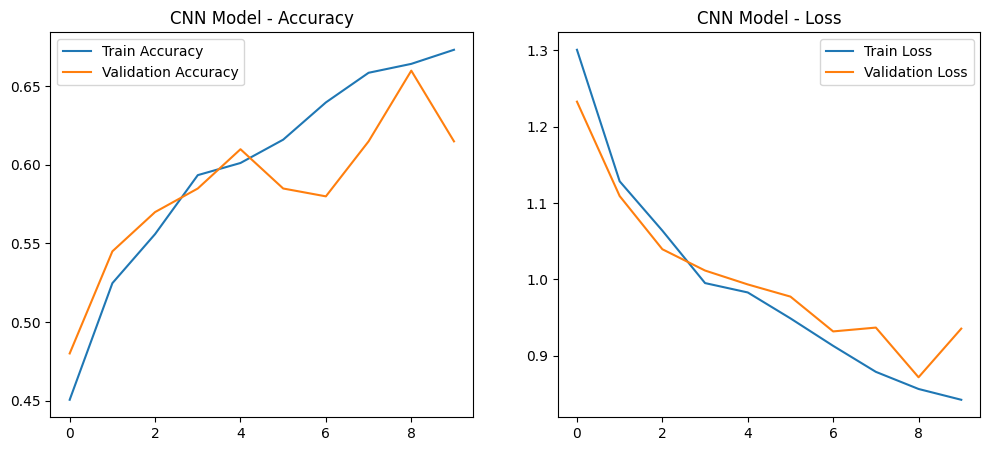

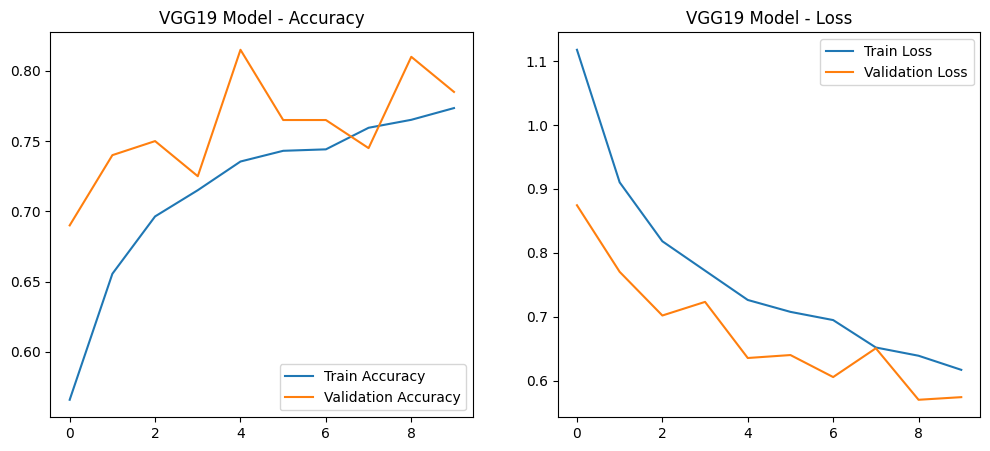

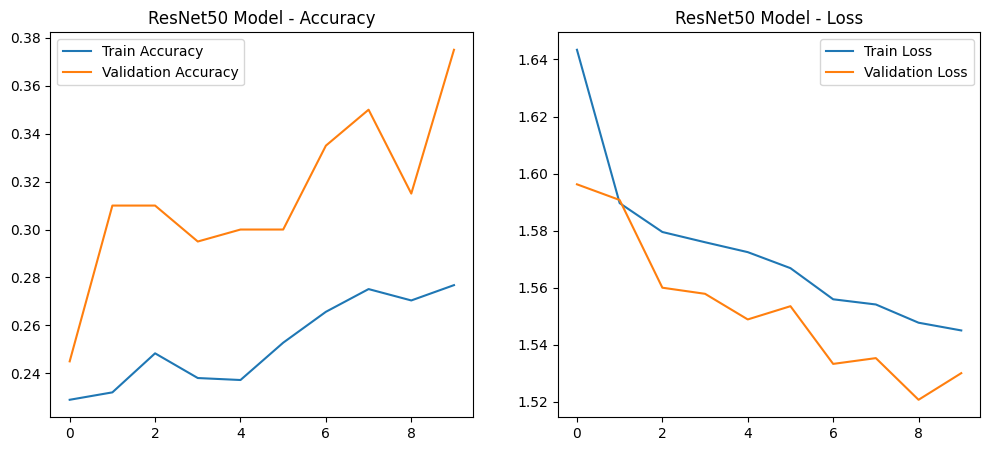

In [ ]:
def plot_results(history, title):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + " - Loss")
    plt.legend()

    plt.show()

plot_results(history, "CNN Model")
plot_results(history_vgg, "VGG19 Model")
plot_results(history_resnet, "ResNet50 Model")


### Save Model

In [ ]:
cnn_model.save("cnn_fruit_classifier.h5")
vgg_model.save("vgg19_fruit_classifier.h5")
resnet_model.save("resnet50_fruit_classifier.h5")